<h4 align="right">3rd of February 2020</h4>
<h1 align="center">Neural Networks and Deep Learning (CIE 555)</h1>
<h2 align="center">Lab 2 (part 1): TensorFlow</h2> <br>

In [1]:
import tensorflow as tf
import numpy as np









### TensorFlow basics

In [0]:
X = tf.constant(5)
Y = tf.constant(10)
S = tf.add(X,Y)
M = tf.multiply(X,Y)
Z = tf.subtract(M,S)

In [3]:
print(Z)

Tensor("Sub:0", shape=(), dtype=int32)


In [4]:
# sess = tf.Session
# print(sess.run(Z))
# sess.close()
with tf.Session() as sess:
    print(sess.run(Z))

35


In [5]:
# integrate with numpy and constants by converting numpy to constants
import numpy as np
X = tf.constant(5)
Y = tf.constant(10)
S = X + np.array(5)
M = Y * 10
Z = tf.subtract(M,S)
with tf.Session() as sess:
    print(sess.run(Z))

90


In [6]:
# broadcasting applies
X = tf.constant(5)
Y = tf.constant(10)
S = X + [1,1,1,1]
M = Y * [5,5,5,5]
Z = tf.subtract(M,S)
# can get tensor dims
print(S.get_shape().as_list())

with tf.Session() as sess:
    print(sess.run(Z))

[4]
[44 44 44 44]


In [7]:
# what if I need to feed data
tf.reset_default_graph()
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
S = tf.add(X,Y)
M = tf.multiply(X,Y)
Z = tf.subtract(M,S)
with tf.Session() as sess:
    print(sess.run(Z, feed_dict = {X:5,Y:10}))

35.0


In [0]:
a = tf.constant([2,2], name = 'a', dtype = tf.int32)
a = tf.zeros([2])
a = tf.zeros((2,), dtype = tf.int32)
b = tf.zeros_like(a)
a = tf.fill([2,2], 5)

In [9]:
with tf.Session() as sess:
  print(sess.run(a))
  print(sess.run(b))

[[5 5]
 [5 5]]
[0 0]


In [0]:
# a = np.array([10,10])
a = np.array([[10,10],[1,1]])
b = np.array([[2, 2],[2, 2]])
c = tf.matmul(a,b)
with tf.Session() as sess:
    print(sess.run(c))

[[40 40]
 [ 4  4]]


In [10]:
# a = np.array([10,10])
a = np.array([[10,10],[1,1]])
b = np.array([[2, 2],[2, 2]])
c = tf.cast(tf.matmul(a,b), dtype = tf.float32)
with tf.Session() as sess:
    print(sess.run(c))

[[40. 40.]
 [ 4.  4.]]


### Regression example on boston dataset

In [0]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [0]:
boston = load_boston()
xtrain, xtest, ytrain, ytest = train_test_split(boston.data, boston.target.reshape(-1,1), test_size = 0.2, random_state = 1)

In [0]:
def placeholders(nx,ny):
  X = tf.placeholder(tf.float32, shape=[None,nx])
  Y = tf.placeholder(tf.float32, shape=[None,ny])
  return X, Y
def init_weights():
  W = tf.get_variable("weights", shape = [13,1], initializer = tf.random_normal_initializer())
  b = tf.get_variable("bias", initializer = tf.constant(0.0))
  return {'W':W, 'b':b}
def forward(X, params):
  W = params['W']
  b = params['b']
  Y = tf.add(tf.matmul(X,W),b)
  return Y
def cost(A, Y):
#   loss = tf.reduce_mean(tf.square(A - Y))
  loss = tf.losses.mean_squared_error(Y, A)
  return loss

In [14]:
# simple regression example
tf.reset_default_graph()
X, Y = placeholders(xtrain.shape[1], ytrain.shape[1])
parameters = init_weights()
preds = forward(X, parameters)
loss = cost(preds, Y)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0000001).minimize(loss)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [15]:
epochs = 10000
losses = []
sess = tf.Session()
sess.run(tf.global_variables_initializer())  # initialize the variables in the tensorflow graph
for i in range(epochs):
#         _, loss = sess.run([optimizer, loss], feed_dict = {X:xtrain}) #beware of the loss variable
    _, loss_train, predictions = sess.run([optimizer, loss, preds], feed_dict = {X : xtrain, Y : ytrain})
    losses.append(loss_train)
    if i % 10 == 0:
        print(i, loss_train)

0 961470.2
10 270117.66
20 76957.586
30 22901.148
40 7692.8496
50 3341.218
60 2030.3145
70 1577.1261
80 1371.3713
90 1241.9375
100 1140.3894
110 1052.6035
120 974.0903
130 903.10004
140 838.69305
150 780.19745
160 727.05347
170 678.76624
180 634.89056
190 595.0227
200 558.7961
210 525.87805
220 495.96613
230 468.78546
240 444.08664
250 421.64264
260 401.24744
270 382.7138
280 365.87152
290 350.56613
300 336.65698
310 324.0166
320 312.5291
330 302.08887
340 292.60037
350 283.9766
360 276.1385
370 269.01422
380 262.5386
390 256.65225
400 251.3015
410 246.43723
420 242.01505
430 237.99449
440 234.33891
450 231.01495
460 227.99231
470 225.24344
480 222.74327
490 220.46918
500 218.40038
510 216.5183
520 214.80557
530 213.24709
540 211.82843
550 210.53706
560 209.36118
570 208.29034
580 207.31487
590 206.42609
600 205.61609
610 204.8777
620 204.20428
630 203.59001
640 203.02943
650 202.51758
660 202.05011
670 201.62296
680 201.23236
690 200.87498
700 200.54787
710 200.24828
720 199.97362
730

In [16]:
testpreds = sess.run(preds, feed_dict = {X:xtest})
loss_test = sess.run(loss, feed_dict = {Y:ytest, preds:testpreds})
print('train loss',loss_train,'\ntest loss',loss_test)

train loss 179.3977 
test loss 135.56267


<function matplotlib.pyplot.show>

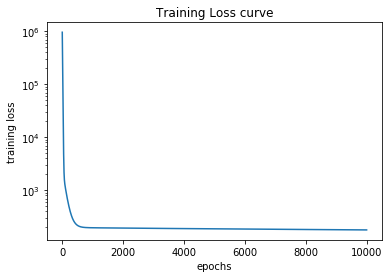

In [17]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.yscale('log')
plt.xlabel('epochs')
plt.ylabel('training loss')
plt.title('Training Loss curve')
plt.show

In [0]:
sess.close()

### Classification practice on iris dataset

#### Data preparation

In [0]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [0]:
iris = load_iris()  # iris.data, iris.target
### To Be Done ### use sklearn OneHotEncoder to encode the data labels --- grade = 5% time = 5 min
y = iris.target.reshape(-1,1)
x = OneHotEncoder(handle_unknown='ignore')
labels = x.fit_transform(y).toarray()
##################
# labels are the encoded iris.target
xtrain, xtest, ytrain, ytest = train_test_split(iris.data, labels, test_size = 0.2, random_state = 1)
#ytrain_ori = enc.inverse_transform(ytrain)
#ytest_ori = enc.inverse_transform(ytest)

#### build model

In [0]:
### To be Done ### implement the four functions grade = 80% time = 1 hour
def placeholders(nx,ny):
  X = tf.placeholder(tf.float32, shape=[None,nx])
  Y = tf.placeholder(tf.float32, shape=[None,ny])
  return X, Y
def init_weights():
  ## For initializing the weights use xavier initializer. See here: https://docs.w3cub.com/tensorflow~python/tf/contrib/layers/xavier_initializer/
  ## For initializing the biases use zeros initializer. 
  W1 = tf.get_variable("weights1", shape = [4,5], initializer = tf.random_normal_initializer()) #tf.contrib.layers.xavier_initializer)
  b1 = tf.get_variable("bias", initializer = tf.zeros((1,5)))      
  W2 = tf.get_variable("weights2", shape = [5,3], initializer = tf.random_normal_initializer()) #tf.contrib.layers.xavier_initializer)
  b2 = tf.get_variable("bias2", initializer = tf.zeros((1,3)))       
  return {'W1':W1, 'b1':b1, 'W2':W2, 'b2':b2}
def forward(X, params):
  W1 = params['W1']
  b1 = params['b1']
  Z1 = tf.add(tf.matmul(X,W1),b1)
  A1 = tf.nn.relu(Z1)                        ## Apply relu activation on the first layer output
  W2 = params['W2']
  b2 = params['b2']
  Z2 = tf.add(tf.matmul(A1,W2),b2)
  Y  = tf.nn.softmax(Z2)                        ## Apply softmax activation on the final predictions
  return Y
def cost(A, Y):      ### Calculate the loss using the appropriate loss function
  loss = tf.losses.mean_squared_error(A,Y)
  return loss
#########################################################
def predict(A):
  return tf.round(A)
def accuracy(A, Y):
  preds = predict(A)
  return tf.metrics.accuracy(Y, preds)

In [0]:
tf.reset_default_graph()
X, Y = placeholders(xtrain.shape[1], ytrain.shape[1])
parameters = init_weights()
preds_proba = forward(X, parameters)
loss = cost(preds_proba, Y)
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
preds = predict(preds_proba)
acc = accuracy(preds_proba, Y)

In [87]:
epochs = 10000
losses = []
accuracy = []
sess = tf.Session()
sess.run(tf.local_variables_initializer())
sess.run(tf.global_variables_initializer())
for i in range(epochs):
      _, loss_train, acc_train, predictions = sess.run([optimizer, loss, acc, preds], feed_dict = {X : xtrain, Y : ytrain})
      losses.append(loss_train)
      accuracy.append(acc_train[0])
      if i % 100 == 0:
        print(i, loss_train, acc_train[0])

0 0.45 0.0
100 0.4499427 0.55
200 0.3138649 0.55
300 0.11255676 0.6031944
400 0.0912792 0.65670836
500 0.07449604 0.7113944
600 0.061106205 0.75427777
700 0.05081148 0.78455955
800 0.04307128 0.8079896
900 0.03725686 0.8265463
1000 0.032854367 0.8413917
1100 0.02947882 0.8533283
1200 0.026857363 0.86345136
1300 0.02479431 0.87203205
1400 0.02314349 0.8793869
1500 0.02180135 0.8857611
1600 0.020694662 0.8913385
1700 0.019761601 0.8962598
1800 0.018963711 0.90071607
1900 0.018272657 0.9047719
2000 0.017666878 0.90842223
2100 0.017130587 0.91172487
2200 0.016650788 0.914822
2300 0.016218444 0.91767997
2400 0.015826307 0.92040855
2500 0.015468876 0.92292553
2600 0.015141938 0.9252489
2700 0.014841923 0.92740023
2800 0.014566104 0.9293978
2900 0.014312076 0.93125767
3000 0.014077701 0.93299353
3100 0.013861201 0.9346174
3200 0.0136608835 0.93613976
3300 0.013475214 0.93758374
3400 0.013302625 0.9389167
3500 0.013141843 0.94026506
3600 0.012991572 0.9415386
3700 0.012850654 0.94274324
3800 0

<function matplotlib.pyplot.show>

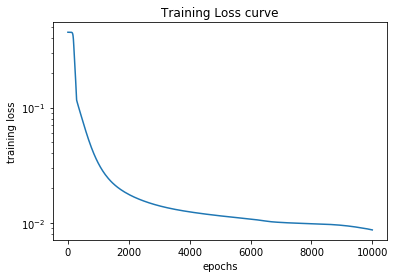

In [88]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.yscale('log')
plt.xlabel('epochs')
plt.ylabel('training loss')
plt.title('Training Loss curve')
plt.show

<function matplotlib.pyplot.show>

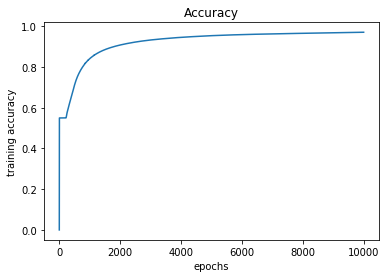

In [89]:
import matplotlib.pyplot as plt
plt.plot(accuracy)
plt.xlabel('epochs')
plt.ylabel('training accuracy')
plt.title('Accuracy')
plt.show

#### Validate

In [90]:
### To be Done ### get test accuracy grade = 15% time = 20 min

testprobas = sess.run(preds_proba, feed_dict = {X:xtest})
testpreds = sess.run(preds, feed_dict = {X:xtest})
acc_test = sess.run(acc, feed_dict = {X:xtest, Y:ytest})
print('train accuracy',acc_train[0],'\ntest accuracy',acc_test[0])

#####################################################################

train accuracy 0.9710774 
test accuracy 0.9710797


### multiple Graphs

In [91]:
# multiple graphs
tf.reset_default_graph()
g = tf.Graph()
with g.as_default():
    X = tf.constant(5)
    Y = tf.constant(10)
    S = tf.add(X,Y)
    M = tf.multiply(X,Y)
    Z = tf.subtract(M,S)
with tf.Session(graph = g) as sess:
    print(sess.run(Z))
g2 = tf.Graph()
with g2.as_default():
    X = tf.placeholder(tf.float32)
    Y = tf.placeholder(tf.float32)
    S = tf.add(X,Y)
    M = tf.multiply(X,Y)
    Z = tf.subtract(M,S)
with tf.Session(graph = g2) as sess:
    print(sess.run(Z, feed_dict = {X:5,Y:10}))

35
35.0
